Preparing notebook

In [86]:
%load_ext autoreload
%autoreload 2

seed: int = 42
import numpy as np
import random

np.random.seed(seed)
random.seed(seed)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading data for exploration. Some considerations:
* We are replacing missing values with linear interpolation.
* No resampling performed. It appears to be every two hours

In [87]:
import insight_lander

data_frame = insight_lander.get_dataset()
data_frame.head(10)

,Sol,solar_longitude,local_time,assim_surface_pressure,assim_eastwind_speed,assim_northwind_speed,assim_dust_opticaldepth,assim_air_temperature,surface_pressure,air_temperature,eastward_wind_speed,northward_wind_speed
observation_time,,,,,,,,,,,,
2018-12-17 12:32:00,7261.083,307.968,9,754.965,-9.575,6.376,0.397,194.534,757.030,205.157,3.3630,4.349000
2018-12-17 14:35:00,7261.167,308.018,11,727.660,-9.070,4.206,0.397,198.137,743.842,226.743,3.5620,1.863000
2018-12-17 16:38:00,7261.250,308.068,13,716.942,-8.358,0.466,0.397,200.567,732.172,243.768,-4.1390,6.710000
2018-12-17 18:41:00,7261.333,308.119,15,715.132,-7.416,-2.551,0.397,197.131,721.586,248.897,4.7570,-4.860000
2018-12-17 20:45:00,7261.417,308.169,17,733.721,-3.493,-2.320,0.397,193.254,714.435,240.921,1.8880,-5.626000
2018-12-17 22:48:00,7261.500,308.219,19,749.632,-1.064,-0.944,0.398,192.469,721.549,206.215,3.7215,-4.448500
2018-12-18 00:51:00,7261.583,308.269,21,757.972,0.679,-1.736,0.417,197.935,743.325,202.735,5.5550,-3.271000
2018-12-18 02:54:00,7261.667,308.319,23,766.047,2.083,-1.228,0.445,201.178,753.788,193.581,5.8370,-3.890000
2018-12-18 04:58:00,7261.750,308.369,1,768.194,2.591,0.367,0.409,203.078,755.615,188.632,5.5180,-3.723000


General data information

In [88]:
data_frame.describe()

,Sol,solar_longitude,local_time,assim_surface_pressure,assim_eastwind_speed,assim_northwind_speed,assim_dust_opticaldepth,assim_air_temperature,surface_pressure,air_temperature,eastward_wind_speed,northward_wind_speed
count,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000,9360.000000
mean,7651.041667,185.702436,12.000000,734.859067,-0.045858,1.196319,0.429792,189.494456,720.453788,211.778095,1.085076,1.341622
std,225.178633,114.709380,6.904474,43.590203,4.190181,4.923251,0.235886,10.542678,46.431030,27.127173,4.364519,3.316893
min,7261.083000,0.026000,1.000000,606.155000,-14.162000,-13.810000,0.010000,158.123000,600.849000,169.914000,-16.245000,-9.243000
25%,7456.062250,82.721750,6.500000,703.584500,-2.857000,-2.124000,0.238000,181.068500,693.397750,186.795167,-1.366250,-1.058625
50%,7651.041500,180.227500,12.000000,738.014000,0.633000,1.428500,0.387000,189.329000,729.584500,205.490500,2.408000,1.259310
75%,7846.020750,303.173750,17.500000,765.961000,2.205250,4.015000,0.533250,197.453000,752.931089,237.468939,3.657201,3.445000
max,8041.000000,359.992000,23.000000,834.675000,15.755000,16.586000,2.210000,231.866000,811.828000,277.313000,16.318000,12.304000


General dataframe information

In [89]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9360 entries, 2018-12-17 12:32:00 to 2021-02-25 19:50:00
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sol                      9360 non-null   float64
 1   solar_longitude          9360 non-null   float64
 2   local_time               9360 non-null   int64  
 3   assim_surface_pressure   9360 non-null   float64
 4   assim_eastwind_speed     9360 non-null   float64
 5   assim_northwind_speed    9360 non-null   float64
 6   assim_dust_opticaldepth  9360 non-null   float64
 7   assim_air_temperature    9360 non-null   float64
 8   surface_pressure         9360 non-null   float64
 9   air_temperature          9360 non-null   float64
 10  eastward_wind_speed      9360 non-null   float64
 11  northward_wind_speed     9360 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 950.6 KB


Counting NULL values

Querying the time range, to check for well-known dust storm events

In [90]:
print(f"Minimum value {data_frame.index.min()}")
print(f"Maximum value {data_frame.index.max()}")

Minimum value 2018-12-17 12:32:00
Maximum value 2021-12-02 23:45:00


**Question to Kylash:** Is there a well-know dust storm between 2018 and 2021?`

**Note** If global-scale dust storms are really infrequent, we definitely need more data.


Plotting the time series, looking for evidence of dust storms.

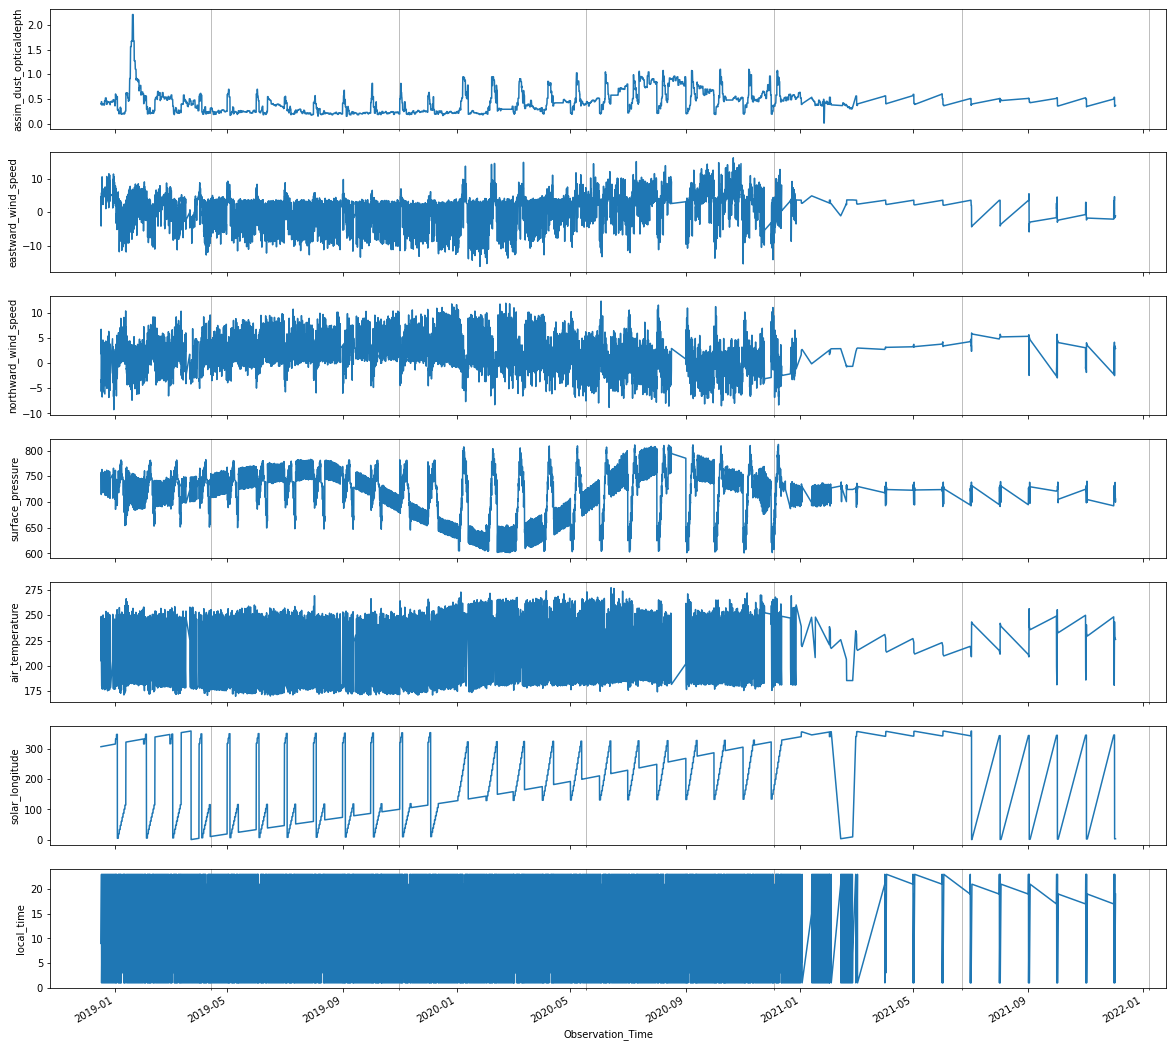

In [91]:
from typing import List

target_columns: List[str] = ["assim_dust_opticaldepth",
                             "eastward_wind_speed",
                             "northward_wind_speed",
                             "surface_pressure",
                             "air_temperature",
                             "solar_longitude",
                             "local_time"]

insight_lander.plot_time_series(dataframe=data_frame,
                                column_names=target_columns)

Now, we define our training and validation dataset. We will try to forecast 1-week values of CDOD

**TODO** Shall we better do this in MARS years?

In [92]:
from gluonts.dataset.common import ListDataset
import pandas as pd

frequency: str = "2H"
start_training: pd.Timestamp = pd.Timestamp(year=2018, month=12, day=17)
end_training: pd.Timestamp = pd.Timestamp(year=2019, month=12, day=17)

target_time_series: List[pd.Series] = [data_frame[target_column] for target_column in target_columns]
training_dataset: ListDataset
training_series, training_dataset = insight_lander.to_list_dataset(target_time_series,
                                                                   start_date=start_training,
                                                                   end_date=end_training,
                                                                   frequency=frequency)
# Only for visualization
training_series[-1]["target"]

observation_time
2018-12-17 12:32:00     9
2018-12-17 14:35:00    11
2018-12-17 16:38:00    13
2018-12-17 18:41:00    15
2018-12-17 20:45:00    17
                       ..
2019-12-16 14:57:00    19
2019-12-16 17:01:00    21
2019-12-16 19:04:00    23
2019-12-16 21:07:00     1
2019-12-16 23:11:00     3
Name: local_time, Length: 4258, dtype: int64

Let's start generating a single test time series

In [93]:
from datetime import timedelta

prediction_days: int = 7
end_testing: pd.Timestamp = end_training + timedelta(days=prediction_days)
testing_series, testing_dataset = insight_lander.to_list_dataset(target_time_series,
                                                                 start_date=start_training,
                                                                 end_date=end_testing,
                                                                 frequency=frequency)
testing_series[-1]["target"]

observation_time
2018-12-17 12:32:00     9
2018-12-17 14:35:00    11
2018-12-17 16:38:00    13
2018-12-17 18:41:00    15
2018-12-17 20:45:00    17
                       ..
2019-12-23 15:33:00    15
2019-12-23 17:36:00    17
2019-12-23 19:40:00    19
2019-12-23 21:43:00    21
2019-12-23 23:46:00    23
Name: local_time, Length: 4340, dtype: int64

**Starting the training process**
From "Atmospheric Dust on Mars: A Review", temperature, pressure and winds matter too.


In [94]:
from gluonts.model.predictor import Predictor
import deepar_forecast

# AWS recommends setting the same value for context and prediction lengths
# https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html
prediction_length: int = prediction_days * 12
context_length: int = prediction_length

epochs: int = 100
learning_rate: float = 1e-3
num_batches_per_epoch: int = 100
evaluation_samples: int = 100

predictor: Predictor = deepar_forecast.train_predictor(training_dataset=training_dataset,
                                                       prediction_length=prediction_length,
                                                       context_length=context_length,
                                                       epochs=epochs,
                                                       learning_rate=learning_rate,
                                                       num_batches_per_epoch=num_batches_per_epoch,
                                                       frequency=frequency)


100%|██████████| 100/100 [00:14<00:00,  6.79it/s, epoch=100/100, avg_epoch_loss=0.701]


Model saved at models/


**TODO** Tune hyperparameters with Optuna. Check: https://github.com/awslabs/gluon-ts/blob/dev/docs/tutorials/advanced_topics/hp_tuning_with_optuna.md.template

**Checking performance on the testing dataset**

Note that the resulting model is global, meaning it can predict all of the time series we provided as input.
However, we are going to focus on performance over `assim_dust_opticaldepth`, for its potential with
respect to dust storms.

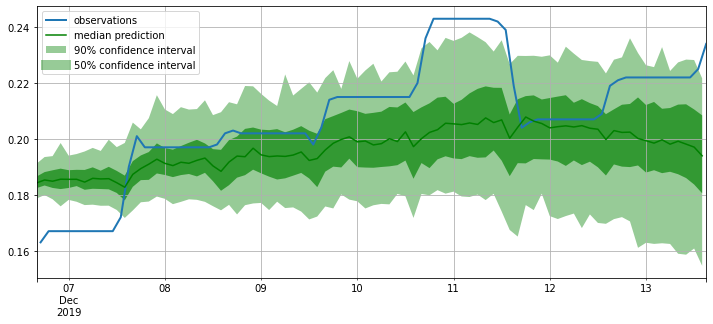

In [95]:
from deepar_forecast import plot_forecasts
from gluonts.model import Forecast
from typing import List
from gluonts.evaluation import make_evaluation_predictions

forecast_iterator, actual_iterator = make_evaluation_predictions(dataset=testing_dataset, predictor=predictor,
                                                                 num_samples=evaluation_samples)
forecast_list: List[Forecast] = list(forecast_iterator)
actual_list: List[pd.Series] = list(actual_iterator)
plot_forecasts(actual_list[0], forecast_list[0], past_length=context_length)

Checking training metrics

In [96]:
from gluonts.evaluation import Evaluator

evaluator: Evaluator = Evaluator(quantiles=[0.5])
aggregate_metrics, item_metrics = evaluator(iter(actual_list), iter(forecast_list))
aggregate_metrics

Running evaluation: 7it [00:00, 34.19it/s]
/tmp/ipykernel_983732/3382959039.py:4: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  aggregate_metrics, item_metrics = evaluator(iter(actual_list), iter(forecast_list))


{'MSE': 3.9487939443008426,
 'abs_error': 664.1933209896088,
 'abs_target_sum': 84325.09002876282,
 'abs_target_mean': 143.4100170557191,
 'seasonal_error': 1.3661240402679835,
 'MASE': inf,
 'MAPE': 0.35672729406632536,
 'sMAPE': 0.1594742039839427,
 'MSIS': inf,
 'QuantileLoss[0.5]': 664.1933319866657,
 'Coverage[0.5]': 0.28401360544217685,
 'RMSE': 1.9871572520313643,
 'NRMSE': 0.013856474553373034,
 'ND': 0.007876580039974533,
 'wQuantileLoss[0.5]': 0.007876580170387166,
 'mean_absolute_QuantileLoss': 664.1933319866657,
 'mean_wQuantileLoss': 0.007876580170387166,
 'MAE_Coverage': 0.21598639455782315,
 'OWA': nan}

Checking individual metrics

In [97]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,ND,MSIS,QuantileLoss[0.5],Coverage[0.5]
0,assim_dust_opticaldepth,0.000385,1.341332,17.461000,0.207869,0.039315,0.406159,0.075087,0.077692,0.076819,2.877744,1.341332,0.154762
1,eastward_wind_speed,1.985822,82.599220,310.333466,3.694446,1.416160,0.694359,1.756665,0.519842,0.266163,4.764790,82.599217,0.523810
2,northward_wind_speed,1.657331,76.180267,332.319000,3.956179,1.292438,0.701703,0.618993,0.469248,0.229238,4.950500,76.180281,0.428571
3,surface_pressure,17.643571,287.368652,54707.066406,651.274600,2.191009,1.561406,0.005243,0.005260,0.005253,9.515371,287.368652,0.059524
4,air_temperature,5.553337,142.267609,17593.041016,209.440964,3.119451,0.542936,0.007736,0.007783,0.008087,4.155992,142.267609,0.297619
5,solar_longitude,0.790841,68.872963,10356.869141,123.296061,1.504495,0.544978,0.006629,0.006655,0.006650,2.891079,68.872963,0.000000
6,local_time,0.010272,5.563277,1008.000000,12.000000,0.000000,inf,0.026738,0.029839,0.005519,inf,5.563277,0.523810


**Observations**
* For CDOD, using wind time series: 0.000122 MSE and 0.67 abs_error
* Including temperature and pressure: 0.000297 MSE and 1.010900 abs_error
* All features: 0.000385 MSE and 1.341332 abs_error